In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns

### **importing the dataset**

In [4]:
data=pd.read_csv("PersonalLoan.csv")

In [5]:
data.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


### **EDA**

In [11]:
y=data.drop(["ID","ZIP Code"],axis=1,inplace=True)

In [12]:
data.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1


In [16]:
data.corr()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
Age,1.000000,0.994215,-0.055269,-0.046418,-0.052012,0.041334,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
Experience,0.994215,1.000000,-0.046574,-0.052563,-0.050077,0.013152,-0.010582,-0.007413,-0.001232,0.010353,0.013898,0.008967
Income,-0.055269,-0.046574,1.000000,-0.157501,0.645984,-0.187524,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385
Family,-0.046418,-0.052563,-0.157501,1.000000,-0.109275,0.064929,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.052012,-0.050077,0.645984,-0.109275,1.000000,-0.136124,0.109905,0.366889,0.015086,0.136534,-0.003611,-0.006689
Education,0.041334,0.013152,-0.187524,0.064929,-0.136124,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.012539,-0.010582,0.206806,-0.020445,0.109905,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
Personal Loan,-0.007726,-0.007413,0.502462,0.061367,0.366889,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802
Securities Account,-0.000436,-0.001232,-0.002616,0.019994,0.015086,-0.010812,-0.005411,0.021954,1.000000,0.317034,0.012627,-0.015028
CD Account,0.008043,0.010353,0.169738,0.014110,0.136534,0.013934,0.089311,0.316355,0.317034,1.000000,0.175880,0.278644


In [17]:
y=data.drop(["Age","Experience","Online","CreditCard","Securities Account"],axis=1,inplace=True)

In [18]:
data.head()

,Income,Family,CCAvg,Education,Mortgage,Personal Loan,CD Account
0,49,4,1.6,1,0,0,0
1,34,3,1.5,1,0,0,0
2,11,1,1.0,1,0,0,0
3,100,1,2.7,2,0,0,0
4,45,4,1.0,2,0,0,0


In [20]:
data.isna().sum()

Income           0
Family           0
CCAvg            0
Education        0
Mortgage         0
Personal Loan    0
CD Account       0
dtype: int64

In [21]:
data.isnull().sum()

Income           0
Family           0
CCAvg            0
Education        0
Mortgage         0
Personal Loan    0
CD Account       0
dtype: int64

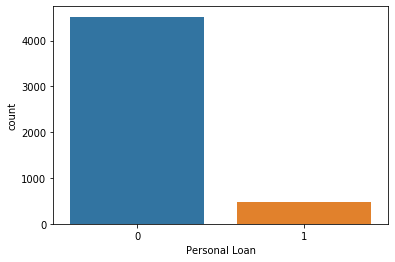

In [25]:
sns.countplot(x="Personal Loan", data=data)

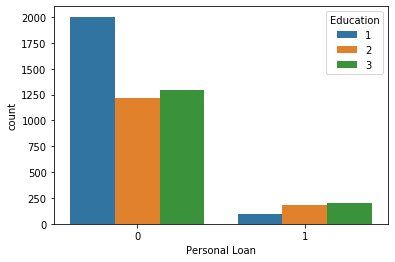

In [26]:
sns.countplot(x="Personal Loan",hue="Education", data=data)

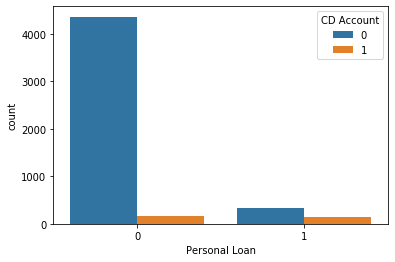

In [28]:
sns.countplot(x="Personal Loan",hue="CD Account", data=data)

In [29]:
data.head()

,Income,Family,CCAvg,Education,Mortgage,Personal Loan,CD Account
0,49,4,1.6,1,0,0,0
1,34,3,1.5,1,0,0,0
2,11,1,1.0,1,0,0,0
3,100,1,2.7,2,0,0,0
4,45,4,1.0,2,0,0,0


### **splitting the dataset**

In [32]:
y=data.iloc[:,5:6]

In [31]:
X=data.drop("Personal Loan",axis=1)

In [34]:
X1=sm.add_constant(X)

In [37]:
Logistic=sm.Logit(y,X1)

In [38]:
result=Logistic.fit()

Optimization terminated successfully.
         Current function value: 0.133920
         Iterations 9


In [39]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          Personal Loan   No. Observations:                 5000
Model:                          Logit   Df Residuals:                     4993
Method:                           MLE   Df Model:                            6
Date:                Sun, 09 Aug 2020   Pseudo R-squ.:                  0.5765
Time:                        18:47:57   Log-Likelihood:                -669.60
converged:                       True   LL-Null:                       -1581.0
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -13.7749      0.551    -24.981      0.000     -14.856     -12.694
Income         0.0543      0.003     21.472      0.000       0.049       0.059
Family         0.6857      0.073      9.457      0.000       0.544       0.828
CCAvg          0.1114      0.039      2.892      0.004       0.036       0.187
Education      1.6838      0.110     15.370      0.000       1.469       1.899
Mortgage       0.0006      0.001      1.038      0.299      -0.001       0.002
CD Account     2.4781      0.224     11.073      0.000       2.039       2.917
==============================================================================
"""

#### **the personal depends upon income,Family,Education,Mortgage and CD Account**